
This is from the RDKit blog
http://rdkit.blogspot.com/2016/05/trying-out-py3dmol.html
<hr>

I first saw [3DMol.js](http://3dmol.csb.pitt.edu/) from Dave Koes' group at the ACS meeting in San Diego. It looked great, but I haven't had time to get back to it.

This morning Dave Tweeted about Jupyter integration for 3DMol.js and I just had to try it. This is the small experiment to see what's possible.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
print(rdBase.rdkitVersion)
import os,time
print( time.asctime())

2018.09.1
Sat Mar 16 20:08:13 2019


In [2]:
import py3Dmol

Start with an example from the py3Dmol docs, just to make sure things are working:

In [3]:
p = py3Dmol.view(query='pdb:1ycr')
p.setStyle({'cartoon': {'color':'spectrum'}})
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Demonstrate loading PDB data:

In [4]:
#crambin = open('1CRN.pdb','r').read()
crambin = open('InitialAtomicStructure.pdb','r').read()
p = py3Dmol.view(width=400,height=400)
p.addModel(crambin,'pdb')
#p.setStyle({'cartoon': {'color':'spectrum'}})
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Here's a molecule from the RDKit distance geometry tests:

In [5]:
m = Chem.AddHs(Chem.MolFromSmiles('COc1ccc2[C@H](O)[C@@H](COc2c1)N3CCC(O)(CC3)c4ccc(F)cc4'))
AllChem.EmbedMultipleConfs(m,useExpTorsionAnglePrefs=True,useBasicKnowledge=True)
mb = Chem.MolToMolBlock(m)
p = py3Dmol.view(width=400,height=400)
p.addModel(mb,'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The thing I really want to be able to do is look at multiple molecules, so let's try showing all the conformers aligned to each other.

(8, 6, 7, 5, 4, 3, 2, 12, 11, 10, 9)


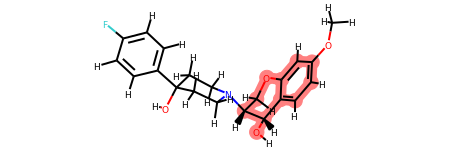

In [6]:
core = m.GetSubstructMatch(Chem.MolFromSmiles('C1C(O)c2ccccc2OC1'))
print(core)
m

In [7]:
AllChem.AlignMolConformers(m,atomIds=core)

In [8]:
p = py3Dmol.view(width=400,height=400)
for conf in m.GetConformers():
    mb = Chem.MolToMolBlock(m,confId=conf.GetId())
    p.addModel(mb,'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

And lastly, let's look at results from the 3D alignment code:

In [9]:
suppl = Chem.SDMolSupplier('ref_e2.sdf',removeHs=False)
ms = [x for x in suppl]
len(ms)

56

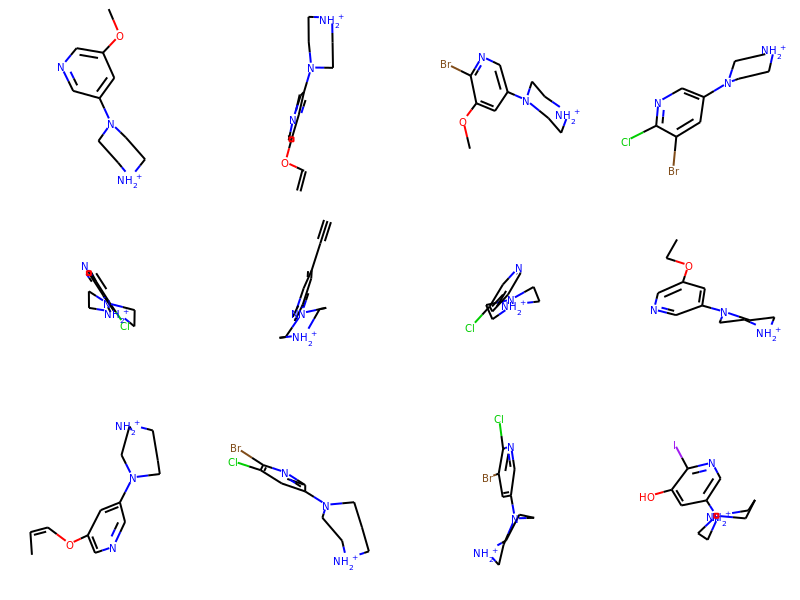

In [10]:
Draw.MolsToGridImage([Chem.RemoveHs(x) for x in ms[:12]],molsPerRow=4)

Pick two of those molecules and generate new conformations for them, then display them to demonstrate that they really aren't aligned:

In [11]:
refMol = ms[0]
prbMol = ms[10]
AllChem.EmbedMolecule(refMol,useExpTorsionAnglePrefs=True,useBasicKnowledge=True)
AllChem.EmbedMolecule(prbMol,useExpTorsionAnglePrefs=True,useBasicKnowledge=True)

p = py3Dmol.view(width=400,height=400)
p.addModel(Chem.MolToMolBlock(ms[0]),'sdf')
p.addModel(Chem.MolToMolBlock(ms[10]),'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Now align and display them:

In [12]:
o3a = AllChem.GetO3A(prbMol,refMol)
score  = o3a.Score()
rmsd = o3a.Align()
print("Score: %.3f, RMSD: %.3f"%(score,rmsd))
p = py3Dmol.view(width=400,height=400)
p.addModel(Chem.MolToMolBlock(refMol),'sdf')
p.addModel(Chem.MolToMolBlock(prbMol),'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

Score: 95.258, RMSD: 0.262


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

There's still lots to learn here; I'm looking forward to some more experimentation.